In [79]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(1)

In [80]:
X_train = pd.read_csv("D:/DSP/Assignment2/X_train.csv")
X_test = pd.read_csv("D:/DSP/Assignment2/X_test.csv")
y_train = pd.read_csv("D:/DSP/Assignment2/y_train.csv")
y_test = pd.read_csv("D:/DSP/Assignment2/y_test.csv")

In [81]:
X_train.shape

(14, 18)

In [82]:
y_train.shape

(14, 1)

MLP with SK Learn

In [83]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(X_train, y_train)


Iteration 1, loss = 0.70021344
Validation score: 0.500000
Iteration 2, loss = 0.68329935
Validation score: 0.500000
Iteration 3, loss = 0.66813348
Validation score: 0.500000
Iteration 4, loss = 0.65490539
Validation score: 0.500000
Iteration 5, loss = 0.64371718
Validation score: 0.500000
Iteration 6, loss = 0.63343243
Validation score: 0.500000
Iteration 7, loss = 0.62419870
Validation score: 0.500000
Validation score did not improve more than tol=0.000010 for 5 consecutive epochs. Stopping.
CPU times: total: 0 ns
Wall time: 14.6 ms


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does no

In [84]:
model1.loss_curve_

[0.7002134351750877,
 0.6832993488526599,
 0.6681334828695428,
 0.6549053942334147,
 0.6437171801566586,
 0.6334324337778381,
 0.6241986965985716]

In [85]:
%%time
y_pred = model1.predict(X_test)

CPU times: total: 0 ns
Wall time: 2.46 ms


In [86]:
print(classification_report(y_test, y_pred ,digits=4))

              precision    recall  f1-score   support

           1     0.8000    1.0000    0.8889        12
           2     0.0000    0.0000    0.0000         3

    accuracy                         0.8000        15
   macro avg     0.4000    0.5000    0.4444        15
weighted avg     0.6400    0.8000    0.7111        15



C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


as per the above values it can be seen that the accuracy is 80%. 

In [87]:
y_pred = model1.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

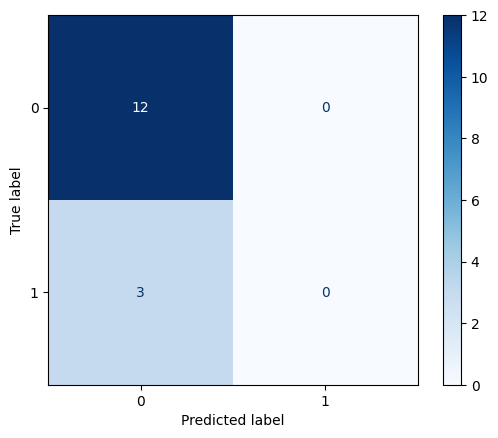

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

RandomSearchCV

In [89]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (64,), (128,),(128,64), (64,128), (64,128,196), (196,128,64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .0001, .0005, .001, .005],
    'batch_size': [25, 50, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001, 0.005, 0.01],
    'max_iter': [5000],
    'tol': [0.000005, 0.00001, 0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='precision', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits


ValueError: 
All the 900 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 428, in _fit
    self._fit_stochastic(
  File "C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 601, in _fit_stochastic
    X, X_val, y, y_val = train_test_split(
  File "C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py", line 2469, in train_test_split
    train, test = next(cv.split(X=arrays[0], y=stratify))
  File "C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py", line 1622, in split
    for train, test in self._iter_indices(X, y, groups):
  File "C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py", line 1981, in _iter_indices
    raise ValueError(
ValueError: The test_size = 1 should be greater or equal to the number of classes = 2


In [ ]:
print(f"The best f1 score is {random_search.best_score_}")
print(f"... with parameters: {random_search.best_params_}")

model2 = random_search.best_estimator_

print(random_search.best_params_)


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [ ]:
%%time
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     1.0000    0.0833    0.1538        12
           2     0.2143    1.0000    0.3529         3

    accuracy                         0.2667        15
   macro avg     0.6071    0.5417    0.2534        15
weighted avg     0.8429    0.2667    0.1937        15

CPU times: total: 0 ns
Wall time: 5.43 ms


In [ ]:
y_pred = model2.predict(X_test)
y_pred

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

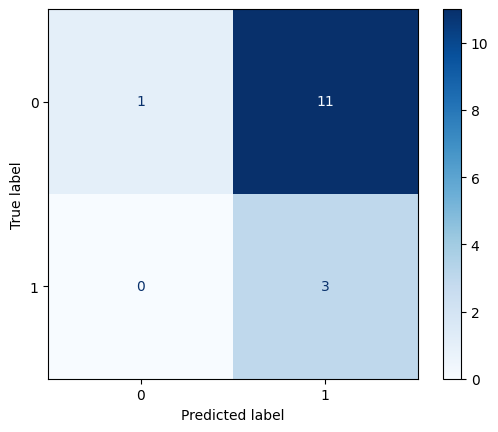

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Wide Network

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_wide = keras.models.Sequential()
model_wide.add(keras.layers.Input(18))
model_wide.add(keras.layers.Dense(124, activation="relu"))
model_wide.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:

model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               2356      
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 2,481
Trainable params: 2,481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_wide.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model_wide.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1/1 [==============================] - 1s 901ms/step - loss: 1.5232 - accuracy: 0.0000e+00 - val_loss: 1.2682 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 42ms/step - loss: 1.3571 - accuracy: 0.0000e+00 - val_loss: 1.1541 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 45ms/step - loss: 1.2030 - accuracy: 0.0714 - val_loss: 1.0491 - val_accuracy: 0.0667
Epoch 4/10
1/1 [==============================] - 0s 47ms/step - loss: 1.0593 - accuracy: 0.0714 - val_loss: 0.9519 - val_accuracy: 0.0667
Epoch 5/10
1/1 [==============================] - 0s 47ms/step - loss: 0.9250 - accuracy: 0.0714 - val_loss: 0.8618 - val_accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 0.8005 - accuracy: 0.2143 - val_loss: 0.7787 - val_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 45ms/step - loss: 0.6852 - accuracy: 0.4286 - val_loss: 0.7006 - val_accuracy: 0.5333
Epoch 8/10

In [ ]:
loss, accuracy = model_wide.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.4922 - accuracy: 0.8000


In [ ]:
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

Loss 0.49222
Accuracy 0.8000


In [ ]:
model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               2356      
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 2,481
Trainable params: 2,481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

[('regeneration of', 1)]


1/1 [==============================] - 0s 88ms/step


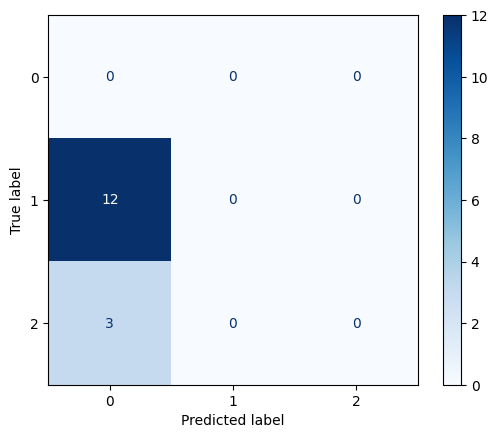

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [93]:



from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.8000    1.0000    0.8889        12
           2     0.0000    0.0000    0.0000         3

    accuracy                         0.8000        15
   macro avg     0.4000    0.5000    0.4444        15
weighted avg     0.6400    0.8000    0.7111        15



C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we got the accuracy of 80% we got with this wide network

Deep Network

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model_deep = keras.models.Sequential()
model_deep.add(keras.layers.Input(18))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(1, activation="sigmoid"))

We can also create this network using the syntax below...

In [ ]:
input_ = keras.layers.Input(18)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
output = keras.layers.Dense(1, activation="sigmoid")(hidden4)
model_deep = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model_deep.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 1s 849ms/step - loss: 0.5921 - accuracy: 0.5000 - val_loss: 0.5917 - val_accuracy: 0.8000
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 0.5204 - accuracy: 0.5000 - val_loss: 0.5426 - val_accuracy: 0.8000
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 0.4502 - accuracy: 0.5000 - val_loss: 0.4935 - val_accuracy: 0.8000
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 0.3811 - accuracy: 0.5000 - val_loss: 0.4464 - val_accuracy: 0.8000
Epoch 5/50
1/1 [==============================] - 0s 39ms/step - loss: 0.3144 - accuracy: 0.5000 - val_loss: 0.3998 - val_accuracy: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.2475 - accuracy: 0.5000 - val_loss: 0.3529 - val_accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.1802 - accuracy: 0.5000 - val_loss: 0.3055 - val_accuracy: 0.8000
Epoch 8/50
1/1 [==========

In [ ]:
loss, accuracy = model_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

1/1 [==============================] - 0s 29ms/step - loss: -1214914275326509687521662919889649664.0000 - accuracy: 0.8000
Loss -1214914275326509687521662919889649664.00000
Accuracy 0.8000


In [ ]:
model_deep.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_6 (Dense)             (None, 128)               2432      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 52,097
Trainable params: 52,097
Non-trainable p

[('regeneration of', 1)]
1/1 [==============================] - 0s 95ms/step


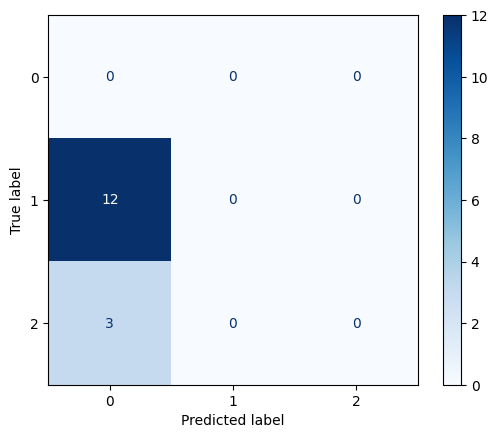

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

# display the confusion matrix
y_pred = model_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.8000    1.0000    0.8889        12
           2     0.0000    0.0000    0.0000         3

    accuracy                         0.8000        15
   macro avg     0.4000    0.5000    0.4444        15
weighted avg     0.6400    0.8000    0.7111        15



C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We got the Accuracy value as 80% with the deep network.

Wide and Deep Network

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input_ = keras.layers.Input(18)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model_wide_deep.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model_wide_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 1s 964ms/step - loss: 0.3115 - accuracy: 0.5000 - val_loss: 0.3525 - val_accuracy: 0.7333
Epoch 2/50
1/1 [==============================] - 0s 53ms/step - loss: 0.1926 - accuracy: 0.5000 - val_loss: 0.2793 - val_accuracy: 0.7333
Epoch 3/50
1/1 [==============================] - 0s 46ms/step - loss: 0.0797 - accuracy: 0.5000 - val_loss: 0.2107 - val_accuracy: 0.8000
Epoch 4/50
1/1 [==============================] - 0s 53ms/step - loss: -0.0270 - accuracy: 0.5000 - val_loss: 0.1466 - val_accuracy: 0.8000
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: -0.1284 - accuracy: 0.5000 - val_loss: 0.0864 - val_accuracy: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: -0.2252 - accuracy: 0.5000 - val_loss: 0.0293 - val_accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 52ms/step - loss: -0.3179 - accuracy: 0.5000 - val_loss: -0.0253 - val_accuracy: 0.8000
Epoch 8/50
1/1 [=====

In [ ]:
loss, accuracy = model_wide_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

1/1 [==============================] - 0s 28ms/step - loss: -6.6442 - accuracy: 0.8000
Loss -6.64421
Accuracy 0.8000


In [ ]:
model_wide_deep.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 128)          2432        ['input_4[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 128)          16512       ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 128)          16512       ['dense_12[0][0]']               
                                                                                            

1/1 [==============================] - 0s 67ms/step


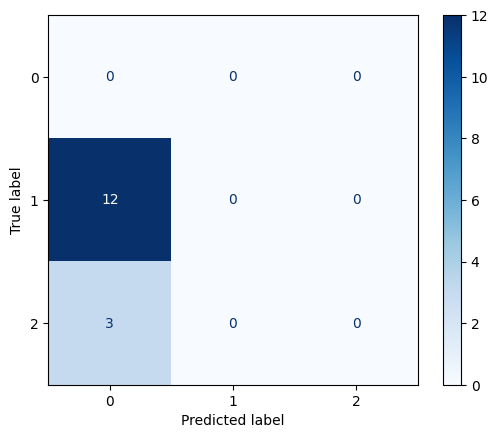

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.8000    1.0000    0.8889        12
           2     0.0000    0.0000    0.0000         3

    accuracy                         0.8000        15
   macro avg     0.4000    0.5000    0.4444        15
weighted avg     0.6400    0.8000    0.7111        15



C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we got the accuracy of 80% for wide and deep network

keras with SKLearn

In [ ]:
import tensorflow as tf


In [ ]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    #though you could return a compiled model, it's not necessary, and would result in the loss of these
    # parameters in the tune process - as they would be 'hard coded'
    # model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

    return model

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=18,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: total: 0 ns
Wall time: 40 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 18,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [ ]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['binary_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 18,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [ ]:
%%time

#Comments missing

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='precision',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=50, 
    cv=3)

_ = rnd_search_cv.fit(X_train, y_train,  verbose=1)


Epoch 1/10
1/1 [==============================] - 1s 579ms/step - loss: 0.7102
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7007
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6923
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6846
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6775
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6709
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6644
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6580
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6516
Epoch 10/10
1/1 [==============================] - 0s 62ms/step
Epoch 1/10
1/1 [==============================] - 0s 474ms/step - loss: 0.7311
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7139
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6975
Epoch 4/

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 462ms/step - loss: 0.7082
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6553
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6088
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5694
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5360
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5036
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4714
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4414
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.4138
Epoch 10/10
1/1 [==============================] - 0s 44ms/step
Epoch 1/10
1/1 [==============================] - 0s 465ms/step - loss: 0.7754
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6575
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5692
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 327ms/step - loss: 0.7168
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7168
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7168
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7168
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7167
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7167
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7167
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7166
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7166
Epoch 10/10
1/1 [==============================] - 0s 46ms/step
Epoch 1/10
1/1 [==============================] - 0s 303ms/step - loss: 0.6827
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6827
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6826
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 312ms/step - loss: 0.6632
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6631
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6631
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6631
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6631
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6631
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6630
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6630
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6630
Epoch 10/10
1/1 [==============================] - 0s 47ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 371ms/step - loss: 0.7065
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7322
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7282
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6879
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7074
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6917
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7174
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7248
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6974
Epoch 10/10
1/1 [==============================] - 0s 51ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 341ms/step - loss: 0.6808
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6954
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6822
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6868
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6975
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6594
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6765
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6828
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7053
Epoch 10/10
1/1 [==============================] - 0s 47ms/step
Epoch 1/10
1/1 [==============================] - 0s 397ms/step - loss: 0.7698
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7689
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7525
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 391ms/step - loss: 0.8888
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 0.8580
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8112
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7745
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8111
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7675
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7754
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7816
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7522
Epoch 10/10
1/1 [==============================] - 0s 52ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 388ms/step - loss: 0.7496
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7157
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7014
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7768
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7371
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7005
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7087
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7281
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6910
Epoch 10/10
1/1 [==============================] - 0s 54ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 321ms/step - loss: 0.7090
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7115
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6886
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7042
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6650
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6742
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6324
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6816
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6747
Epoch 10/10
1/1 [==============================] - 0s 44ms/step
Epoch 1/10
1/1 [==============================] - 0s 409ms/step - loss: 0.7055
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6391
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5867
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 321ms/step - loss: 0.6911
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6660
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7034
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7028
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7032
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6778
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6519
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6707
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6891
Epoch 10/10
1/1 [==============================] - 0s 45ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 435ms/step - loss: 0.7360
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6989
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7251
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7190
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7306
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7311
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6869
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7223
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7539
Epoch 10/10
1/1 [==============================] - 0s 45ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 1s 543ms/step - loss: 0.6731
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7068
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6732
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7005
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6776
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6557
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6804
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6284
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6816
Epoch 10/10
1/1 [==============================] - 0s 47ms/step
Epoch 1/10
1/1 [==============================] - 0s 435ms/step - loss: 0.6604
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6673
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6898
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 290ms/step - loss: 0.6901
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6901
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6900
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6900
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6900
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6899
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6899
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6899
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6898
Epoch 10/10
1/1 [==============================] - 0s 46ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 292ms/step - loss: 0.6780
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6780
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6779
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6779
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6779
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6779
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6778
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6778
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6778
Epoch 10/10
1/1 [==============================] - 0s 46ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 455ms/step - loss: 0.7015
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6509
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5997
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5512
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5173
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4856
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.4502
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4184
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.3911
Epoch 10/10
1/1 [==============================] - 0s 45ms/step
Epoch 1/10
1/1 [==============================] - 0s 434ms/step - loss: 0.6706
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5731
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5053
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 1s 597ms/step - loss: 0.7216
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5964
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5129
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 0.4561
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 0.3665
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3051
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2297
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 0.1796
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.1205
Epoch 10/10
1/1 [==============================] - 0s 56ms/step
Epoch 1/10
1/1 [==============================] - 1s 562ms/step - loss: 0.7191
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5626
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.4491
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 401ms/step - loss: 0.7410
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7476
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7640
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7710
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7285
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7281
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7596
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7462
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7004
Epoch 10/10
1/1 [==============================] - 0s 52ms/step
Epoch 1/10
1/1 [==============================] - 0s 402ms/step - loss: 0.6873
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6873
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6873
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 1s 726ms/step - loss: 0.7046
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6920
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6809
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6710
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6621
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6538
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6464
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6393
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6325
Epoch 10/10
1/1 [==============================] - 0s 55ms/step
Epoch 1/10
1/1 [==============================] - 1s 605ms/step - loss: 0.6633
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6512
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6394
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 301ms/step - loss: 0.7160
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7156
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7151
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7147
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7142
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7138
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7133
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7129
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7125
Epoch 10/10
1/1 [==============================] - 0s 50ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 298ms/step - loss: 0.7797
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7790
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7783
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7776
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7769
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7763
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7756
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7749
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7743
Epoch 10/10
1/1 [==============================] - 0s 46ms/step
Epoch 1/10
1/1 [==============================] - 0s 455ms/step - loss: 0.8336
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8687
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.8984
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 301ms/step - loss: 0.6031
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6031
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6031
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6030
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6030
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6030
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6030
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6030
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6030
Epoch 10/10
1/1 [==============================] - 0s 49ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 1s 547ms/step - loss: 0.7107
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6900
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6708
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6539
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6384
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6242
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6107
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5976
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5849
Epoch 10/10
1/1 [==============================] - 0s 51ms/step
Epoch 1/10
1/1 [==============================] - 1s 541ms/step - loss: 0.6933
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6696
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6479
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 1s 766ms/step - loss: 0.6470
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6710
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6840
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6795
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6788
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6949
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6730
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7155
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6896
Epoch 10/10
1/1 [==============================] - 0s 61ms/step
Epoch 1/10
1/1 [==============================] - 0s 413ms/step - loss: 0.7039
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6939
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6844
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 303ms/step - loss: 0.7008
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7008
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7008
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7008
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7008
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7008
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7008
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7007
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7007
Epoch 10/10
1/1 [==============================] - 0s 45ms/step
Epoch 1/10
1/1 [==============================] - 0s 386ms/step - loss: 0.7561
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7560
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7559
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 318ms/step - loss: 0.6932
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6932
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6931
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6931
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6931
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6931
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6930
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6930
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6930
Epoch 10/10
1/1 [==============================] - 0s 44ms/step
Epoch 1/10
1/1 [==============================] - 0s 428ms/step - loss: 0.7122
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6513
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5971
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
1/1 [==============================] - 0s 320ms/step - loss: 0.7408
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7395
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7426
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8157
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7695
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7590
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7460
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7105
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7216
Epoch 10/10
1/1 [==============================] - 0s 46ms/step
Epoch 1/10
1/1 [==============================] - 0s 440ms/step - loss: 0.6589
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6426
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6469
Epoch 4/

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 483ms/step - loss: 0.6573
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6573
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6399
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6545
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6355
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6530
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6788
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6828
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7022
Epoch 10/10
1/1 [==============================] - 0s 54ms/step
Epoch 1/10
1/1 [==============================] - 0s 394ms/step - loss: 0.6536
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6830
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6523
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 465ms/step - loss: 0.6802
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6682
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6565
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6455
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6353
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6256
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6162
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6071
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5982
Epoch 10/10
1/1 [==============================] - 0s 49ms/step
Epoch 1/10
1/1 [==============================] - 1s 540ms/step - loss: 0.7381
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7243
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 0.7110
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 1s 568ms/step - loss: 0.7099
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7037
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6872
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7140
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6920
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6584
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6881
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7006
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6934
Epoch 10/10
1/1 [==============================] - 0s 61ms/step
Epoch 1/10
1/1 [==============================] - 1s 642ms/step - loss: 0.7193
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7463
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6899
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 382ms/step - loss: 0.6929
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6910
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6891
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6872
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6853
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6834
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6815
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6797
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6779
Epoch 10/10
1/1 [==============================] - 0s 44ms/step
Epoch 1/10
1/1 [==============================] - 0s 340ms/step - loss: 0.7433
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7380
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7330
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 464ms/step - loss: 0.7224
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6665
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6954
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6974
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6863
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6742
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6737
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6787
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7163
Epoch 10/10
1/1 [==============================] - 0s 52ms/step
Epoch 1/10
1/1 [==============================] - 0s 329ms/step - loss: 0.6829
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6656
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6662
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 338ms/step - loss: 0.6712
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7025
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6304
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6447
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6458
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6823
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6508
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6516
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6620
Epoch 10/10
1/1 [==============================] - 0s 61ms/step
Epoch 1/10
1/1 [==============================] - 1s 779ms/step - loss: 0.7646
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7625
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7338
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 324ms/step - loss: 0.6342
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6150
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5949
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6342
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5994
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6061
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6392
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6445
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6137
Epoch 10/10
1/1 [==============================] - 0s 47ms/step
Epoch 1/10


C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 418ms/step - loss: 0.6844
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6410
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6025
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5649
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5320
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5030
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4740
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4449
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4166
Epoch 10/10
1/1 [==============================] - 0s 43ms/step
Epoch 1/10
1/1 [==============================] - 0s 407ms/step - loss: 0.7227
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6359
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5849
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 311ms/step - loss: 0.6599
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6580
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6561
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6542
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6524
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6505
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6487
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6468
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6450
Epoch 10/10
1/1 [==============================] - 0s 44ms/step
Epoch 1/10
1/1 [==============================] - 0s 360ms/step - loss: 0.7231
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7199
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7166
Epoch 4/10
1/1 [===

C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 438ms/step - loss: 0.7672
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6454
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6201
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6080
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5712
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5261
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4953
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.4777
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4611
Epoch 10/10
1/1 [==============================] - 0s 44ms/step
Epoch 1/10
1/1 [==============================] - 1s 511ms/step - loss: 0.6197
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5399
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.4770
Epoch 4/10
1/1 [===

In [ ]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.0001,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (100,),
 'model__dropout': 0.1,
 'loss': 'binary_crossentropy',
 'epochs': 10,
 'batch_size': 60}

In [ ]:
best_model = rnd_search_cv.best_estimator_

In [ ]:
%%time

print(f"best score {best_model.score(X_test, y_test)}")
print(f"min loss {min(best_model.history_['loss'])}")

1/1 [==============================] - 0s 50ms/step
best score 0.8
min loss 0.7275225520133972
CPU times: total: 93.8 ms
Wall time: 118 ms


In [ ]:
best_model.history_

defaultdict(list,
            {'loss': [0.7732099890708923,
              0.7800488471984863,
              0.7407511472702026,
              0.7842136025428772,
              0.750500500202179,
              0.7691889405250549,
              0.7618118524551392,
              0.7767772674560547,
              0.7307316660881042,
              0.7275225520133972]})

1/1 [==============================] - 0s 22ms/step


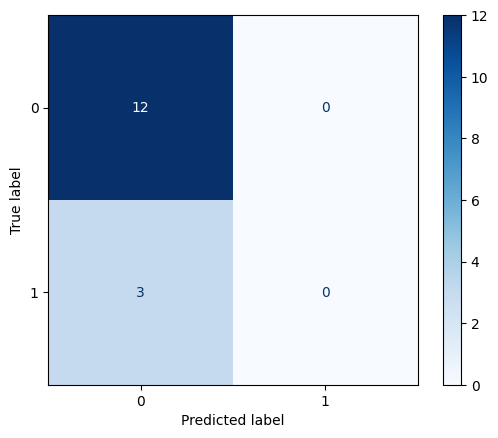

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test), digits=4))

1/1 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           1     0.8000    1.0000    0.8889        12
           2     0.0000    0.0000    0.0000         3

    accuracy                         0.8000        15
   macro avg     0.4000    0.5000    0.4444        15
weighted avg     0.6400    0.8000    0.7111        15



C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssand\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As per the above it can be seen that the accuracy measure for the keras using sklearn is 80%

All models all performming in same fashion . So, based on the results we can say logistic regression is performming better with this datsset.